# Introducción al Procesado del Lenguaje Natural

### Aprendizaje Automático Intermedio e Ingeniería de Características


**Vanessa Gómez Verdejo, Emilio Parrado Hernández,  Pablo Martínez Olmos**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


In [1]:
%matplotlib inline
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'
# High quality figures
import matplotlib.pyplot as plt
import numpy as np

# Introducción

Hasta ahora hemos estado trabajando con datos de tipo  numérico o categórico. En esta sesión vamos a ver cómo trabajar con nuestros datos cuando éstos son cadenas de texto. A diferencia de los datos categóricos, en los que tenemos cadenas de texto asociadas a diferentes categorías y que podemos codificar fácilmente (por ejemplo, con un one-hot-encoding), cuando hablamos aquí de información textual nos referimos a frases, documentos y/o corpus de datos con estructura mucho más compleja. Idealmente, a partir de estos datos textuales tenemos que extraer la información necesaria (a poder ser incluyendo contenido semántico) y vectorizarla adecuadamente para poder utilizar o usar modelos de aprendizaje a partir de ella.

En general, gran parte de la forma en que nos comunicamos hoy en día es a través de texto escrito, ya sea en servicios de mensajería, medios sociales y/o correo electrónico. Así, por ejemplo, en servicios/aplicaciones como TripAdvisor, Booking, Amazon, etc., los usuarios escriben reseñas de restaurantes/negocios, hoteles, productos para compartir sus opiniones sobre su experiencia. Estas reseñas, todas escritas en formato de texto, contienen una gran cantidad de información que sería útil responder preguntas relevantes para el negocio usando métodos de aprendizaje automático, por ejemplo, para predecir el mejor restaurante en una determinada zona.

Este tipo de tarea (preprocesado) se denomina **procesamiento del lenguaje natural** (Natural Language Processing, NLP).
El NLP es un subcampo de la lingüística, la informática y la inteligencia artificial que se ocupa de las interacciones entre los ordenadores (o procesadores) y el lenguaje humano; en particular engloba un conjunto de técnicas para permitir que los ordenadores procesen y analicen grandes cantidades de texto.



# Pipeline para el procesado de texto

Como sabemos, los algoritmos de ML procesan números, no palabras, por lo que necesitamos transformar el texto en números significativos que contengan la información relevante de los documentos. Este proceso de convesión de texto a números es lo que llamaremos **vectorización**.

No obstante, para tener una representación útil, se requieren normalmente algunos pasos de **preprocesamiento** previo que limpien y homogenizen los documentos: tokenización, eliminación de *stop-words*, lematización, etc.
La siguiente figura muestra los diferentes pasos que debemos seguir para procesar nuestros documentos hasta poder ser utilizados por nuestro modelo de aprendizaje:

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/NLP/PipelineNLP.png" width="80%">

A lo largo de este notebook, veremos las herramientas que tenemos disponibles en Python para llevar a cabo todos estos pasos. Concretamente, nos centraremos en el uso de dos librerias:
* [NLTK, Natural Language ToolKit](https://www.nltk.org/). Esta libreria es una excelente biblioteca de NLP escrita en Python por expertos tanto del mundo académico como de la industria. NLTK permite crear aplicaciones con datos textuales rápidamente, ya que proporciona un conjunto de clases básicas para trabajar con corpus de datos, incluyendo colecciones de textos (corpus), listas de palabras clave, clases para representar y operar con datos de tipo texto (documentos, frases, palabras, ...) y funciones para realizar tareas comunes de NLP (conversión a token, conteo de palabras, ...). Por lo que va a ser de gran ayuda para el preprocesado de los documentos.
* [Gensim](https://pypi.org/project/gensim/) es otra librería de Python para el modelado por temáticas (*topic modeling*), la indexación de documentos y tareas de recuperación de la información para documentos. Está diseñada para operar con grandes cantidades de información (con implementaciones eficientes y paralelizables/distribuidas) y nos va a ser de gran ayuda para la vectorización de nuestros corpus de datos una vez preprocesados.

Empecemos este notebook cargando la librería NLTK y algunas de sus funcionalidades. A continuación, elegiremos un corpus de datos con el que empezar a analizar las funcionalidades básicas que aportan NLTK y Gensim y sobre el que veremos, uno por uno, en qué consisten los diferentes pasos de nuestro pipeline y cómo podemos implementarlos.

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 1. Cargando nuestro corpus de datos

NLTK incluye diferentes corpus de datos  con los que podemos probar nuestras herramientas. Podemos encontrar información de todos ellos en [NLTK corpus](https://www.nltk.org/book/ch02.html).



## El objeto CorpusReader
Para empezar a trabajar vamos a usar el corpus **inaugural**, uno de los corpus de datos incluidos en NLTK y que consiste en 58 documentos de texto con los discursos presidenciales de los presidentes de EEUU.

La siguiente celda de código nos muestra cómo cargar el corpus...

In [3]:
from nltk.corpus import inaugural
nltk.download('inaugural')
inaugural

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


<PlaintextCorpusReader in '/root/nltk_data/corpora/inaugural'>

Al cargar el corpus, se genera un objeto de tipo `CorpusReader`, llamado `inaugural`, con el contenido del mismo. Dado que un corpus es una colección de documentos/textos, podemos ver que documentos componen este corpus usando la función `.fileids()`.

In [4]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

Una característica de este corpus es que los documentos que lo forman tienen información sobre el año de cada documento. Podemos crear una lista de los años de cada discurso usando [list comprenhension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python):


In [5]:
years = [fileid[:4] for fileid in inaugural.fileids()]
print(years)

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009', '2013', '2017', '2021']


También podemos usar la función `.words()` de `inaugural` para acceder a las palabras que componen los documentos del corpus.

In [6]:
print(inaugural.words())
print(len(inaugural.words()))

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]
152901


Si queremos podemos acceder a un **documento** concreto del corpus y extraer su contenido en crudo con la función `.raw()`.

In [7]:
trump_text = inaugural.raw('2017-Trump.txt')
trump_text

'Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.\n\nWe, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we will confront hardships, but we will get the job done.\n\nEvery 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.\n\nToday\'s ceremony, however, has very special meaning. Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.\n\nFor to

La variable `trump_text` que obtenemos es un único string (con todas las funciones de los tipos string) que contiene todas las palabras del documento que hemos especificado. Por ejemplo, podemos ver los primeros 20 caracteres de este documento como:

In [8]:
print(type(trump_text))

print(trump_text[:20])

print('\n The total number of characters in the document is %d' %(len(trump_text)))

<class 'str'>
Chief Justice Robert

 The total number of characters in the document is 8449


El CorpusReader también nos permite cargar documentos estructurados por **frases**. Para ello tenemos que usar la función `.sents()`.

In [9]:
trump_sents = inaugural.sents('2017-Trump.txt')
print('\n The total number of sentences in the document is %d' %(len(trump_sents)))
print(trump_sents[:5])


 The total number of sentences in the document is 90
[['Chief', 'Justice', 'Roberts', ',', 'President', 'Carter', ',', 'President', 'Clinton', ',', 'President', 'Bush', ',', 'President', 'Obama', ',', 'fellow', 'Americans', ',', 'and', 'people', 'of', 'the', 'world', ':', 'Thank', 'you', '.'], ['We', ',', 'the', 'citizens', 'of', 'America', ',', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', '.'], ['Together', ',', 'we', 'will', 'determine', 'the', 'course', 'of', 'America', 'and', 'the', 'world', 'for', 'many', ',', 'many', 'years', 'to', 'come', '.'], ['We', 'will', 'face', 'challenges', ',', 'we', 'will', 'confront', 'hardships', ',', 'but', 'we', 'will', 'get', 'the', 'job', 'done', '.'], ['Every', '4', 'years', ',', 'we', 'gather', 'on', 'these', 'steps', 'to', 'carry', 'out', 'the', 'orderly', 'and', 'peaceful', 'transfer', 'of', 'power', ',', 'and', 'we

O, directamente, cargarlo a nivel de **palabras** (o **tokens**) usando el método `.words()`. Nótese que cuando hablamos de palabra o token no sólo son palabras con significado, sino que pueden ser números o signos de puntuación.

In [10]:
trump_words = inaugural.words('2017-Trump.txt')
print('\n The total number of words in the document is %d' %(len(trump_words)))
print(trump_words[:5])


 The total number of words in the document is 1693
['Chief', 'Justice', 'Roberts', ',', 'President']


# 2. Preprocesado del corpus

Antes de transformar los datos de entrada de texto en una representación vectorial, necesitamos estructurar y limpiar el texto, y conservar toda la información que permita capturar el contenido semántico del corpus.

Para ello, el procesado típico de NLP aplica los siguientes pasos:

1. Tokenización
2. Limpieza
3. Homogeneización

Nótese que, aunque aquí definamos esta secuencia de pasos, iremos viendo que dependiendo de cómo se apliquen su orden puede variar.

## 2.1. Tokenization

**Tokenización** es el proceso de dividir el texto dado en piezas más pequeñas llamadas tokens. Las palabras, los números, los signos de puntuación y otros pueden ser considerados como tokens.

Ya hemos visto que el objeto `CorpusReader` incluye funciones para dividir el corpus en frases o palabras. Pero NLTK incluye también funciones genéricas para hacer estas operaciones sobre cualquier cadena de texto. En concreto, tiene dos funciones:
- `sent_tokenize`: es un tokenizador de frases. Este tokenizador divide un texto en una lista de oraciones. Para decidir dónde empieza o acaba una frase NLTK tiene un modelo pre-entrenado para el idioma específico en el que estemos trabajando. Este modelo lo hemos cargado al principio con `nltk.download('punkt')`.
- `word_tokenize`/`wordpunct_tokenize`:  Divide un texto en palabras u otros caracteres individuales cómo pueden ser signos de puntuación.

Veamos como funcionan estas funciones con el siguiente texto:

In [11]:
texto = 'I\'m a dog and it\'s great! You\'re cool and Sandy\'s book is big. Don\'t tell her, you\'ll regret it! "Hey", she\'ll say!'
print(texto)

I'm a dog and it's great! You're cool and Sandy's book is big. Don't tell her, you'll regret it! "Hey", she'll say!


In [12]:
sent=nltk.sent_tokenize(texto)
print(sent)

["I'm a dog and it's great!", "You're cool and Sandy's book is big.", "Don't tell her, you'll regret it!", '"Hey", she\'ll say!']


In [13]:
sent_tokens1=nltk.wordpunct_tokenize(texto)
print(sent_tokens1)

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', '"', 'Hey', '",', 'she', "'", 'll', 'say', '!']


In [14]:
sent_tokens2=nltk.word_tokenize(texto)
print(sent_tokens2)

['I', "'m", 'a', 'dog', 'and', 'it', "'s", 'great', '!', 'You', "'re", 'cool', 'and', 'Sandy', "'s", 'book', 'is', 'big', '.', 'Do', "n't", 'tell', 'her', ',', 'you', "'ll", 'regret', 'it', '!', '``', 'Hey', "''", ',', 'she', "'ll", 'say', '!']


Aunque puede parecer que las funciones `wordpunct_tokenize` y `word_tokenize` hacen lo mismo, con este ejemplo vemos que `wordpunct_tokenize` permite separar los signos de puntuación mientras que `word_tokenize` no.  Nótese la diferencia al dividir `I'm` entre ambas funciones.

También podemos combinar `sent_tokenize` y `word_tokenize` para tener frases y cada frase divida en tokens:

In [15]:
for sent in nltk.sent_tokenize(texto):
    print(nltk.wordpunct_tokenize(sent))
    print("**************")

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!']
**************
['You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.']
**************
['Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!']
**************
['"', 'Hey', '",', 'she', "'", 'll', 'say', '!']
**************


##### Ejercicio 1: Tokenización del texto




Seleccionemos ahora uno de los textos de nuestro corpus y veamos cómo aplicar estas funciones:

In [16]:
# Get a text
trump_text = inaugural.raw('2017-Trump.txt')

Complete la siguiente celda de código para dividir el texto en frases e imprima las 5 primeras frases.

In [17]:
#<SOL>
# Divide into sentences
trump_sentences = nltk.sent_tokenize(trump_text)
# Print the sentences
for sent in trump_sentences[:5]:
    print(sent)
    print("**************")
#</SOL>

Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.
**************
We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people.
**************
Together, we will determine the course of America and the world for many, many years to come.
**************
We will face challenges, we will confront hardships, but we will get the job done.
**************
Every 4 years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition.
**************


Complete las siguientes celdas de código para dividir el texto en tokens (considerando y sin considerar la puntuación) e imprima los primeros 5 tokens

In [18]:
#<SOL>
# Divide into words
trump_tokens=nltk.word_tokenize(trump_text)
trump_tokens[:5]
#</SOL>

['Chief', 'Justice', 'Roberts', ',', 'President']

In [19]:
#<SOL>
# Divide into words using the punctuation
trump_tokens=nltk.wordpunct_tokenize(trump_text)
trump_tokens[:5]
#</SOL>

['Chief', 'Justice', 'Roberts', ',', 'President']

## 2.2. Limpieza y homogeneización

Al observar los tokens del corpus podemos ver que hay muchos tokens con algunas letras en mayúsculas y otras en minúsculas, el mismo token unas veces aparece en singular y otras en plural, o el mismo verbo que aparece en diferentes tiempos verbales. Para analizar semánticamente el texto, nos interesa  **homogeneizar** las palabras que formalmente son diferentes pero tienen el mismo significado. En este proceso, lógicamente, estamos perdiendo información de estilo, matices o la intención del escritor u otros aspectos; sin embargo, lo que nos importa es el contenido (temática) del texto y de este modo lo vamos a reforzar para la posterior vectorización.

Para ello podemos usar las herramientas de lematización de NLTK. El proceso habitual de homogeneización consiste en los siguientes pasos:

1. Eliminación de mayúsculas y caracteres no alfanuméricos: de este modo los caracteres alfabéticos en mayúsculas se transformarán en sus correspondientes caracteres en minúsculas y  se eliminarán los caracteres no alfanuméricos, por ejemplo, los signos de puntuación.

2. Limpieza: este paso del preprocesado consiste en eliminar las palabras irrelevantes o **stop words** de los documentos.


3. Stemming/Lematización: eliminar las terminaciones de las palabras para preservar la raíz de las palabras e ignorar la información gramatical (eliminamos marcas de plurales, género, conjugaciones verbales, ...).

En este paso, podemos detectar typos, *misspellings*, faltas de ortografía, etc. que podríamos corregir.

Veamos cómo ir aplicando uno a uno cada uno de estos pasos sobre el texto anterior una vez tokenizado por palabras.

In [20]:
# Get and tokenize the text
trump_text = inaugural.raw('2017-Trump.txt')
trump_tokens=nltk.wordpunct_tokenize(trump_text)
print(trump_tokens)


['Chief', 'Justice', 'Roberts', ',', 'President', 'Carter', ',', 'President', 'Clinton', ',', 'President', 'Bush', ',', 'President', 'Obama', ',', 'fellow', 'Americans', ',', 'and', 'people', 'of', 'the', 'world', ':', 'Thank', 'you', '.', 'We', ',', 'the', 'citizens', 'of', 'America', ',', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', '.', 'Together', ',', 'we', 'will', 'determine', 'the', 'course', 'of', 'America', 'and', 'the', 'world', 'for', 'many', ',', 'many', 'years', 'to', 'come', '.', 'We', 'will', 'face', 'challenges', ',', 'we', 'will', 'confront', 'hardships', ',', 'but', 'we', 'will', 'get', 'the', 'job', 'done', '.', 'Every', '4', 'years', ',', 'we', 'gather', 'on', 'these', 'steps', 'to', 'carry', 'out', 'the', 'orderly', 'and', 'peaceful', 'transfer', 'of', 'power', ',', 'and', 'we', 'are', 'grateful', 'to', 'President', 'Obama', 'and', 'First

#### 2.2.1. Eliminación de mayúsculas y puntuación

##### **Ejercicio 2**: eliminación de mayúsculas y caracteres no alfanuméricos

Convierte todos los tokens de `trump_tokens` a minúsculas (usando el método `.lower()`) y elimina los tokens no alfanuméricos (que puedes detectar con el método `.isalnum()`). Este procesado puedes codificarlo una sola línea de código usando list comprehension.

In [21]:
#<SOL>
trump_tokens_filtered = [el.lower() for el in trump_tokens if el.isalnum()]
print(trump_tokens_filtered)
#</SOL>

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'and', 'people', 'of', 'the', 'world', 'thank', 'you', 'we', 'the', 'citizens', 'of', 'america', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', 'together', 'we', 'will', 'determine', 'the', 'course', 'of', 'america', 'and', 'the', 'world', 'for', 'many', 'many', 'years', 'to', 'come', 'we', 'will', 'face', 'challenges', 'we', 'will', 'confront', 'hardships', 'but', 'we', 'will', 'get', 'the', 'job', 'done', 'every', '4', 'years', 'we', 'gather', 'on', 'these', 'steps', 'to', 'carry', 'out', 'the', 'orderly', 'and', 'peaceful', 'transfer', 'of', 'power', 'and', 'we', 'are', 'grateful', 'to', 'president', 'obama', 'and', 'first', 'lady', 'michelle', 'obama', 'for', 'their', 'gracious', 'aid', 'throughout', 'this', 'trans

#### 2.2.2. Eliminación de stop-words

Este paso del preprocesado consiste en eliminar las palabras irrelevantes o **stop words** de los documentos. Las **stop words** son las palabras más comunes en un idioma como "el", "a", "sobre", "es", "todo". Estas palabras no tienen un significado importante y normalmente se eliminan de los textos. Para aplicar este proceso, se cargan librerías específicas que contienen este listado de palabras por cada idioma.



In [22]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
print('The numer of stopwords is %d' %len(stopwords_en))
print(stopwords_en)

The numer of stopwords is 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

Nótese que las stopwords en inglés están preparadas para quitar contraciones típicas del lenguaje....

In [23]:
from nltk.corpus import stopwords
stopwords_es = stopwords.words('spanish')
print('The numer of stopwords is %d' %len(stopwords_es))
print(stopwords_es)


The numer of stopwords is 313
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'e


Veamos como aplicarlo con un ejemplo:

In [24]:
# We define a text and tokenize it
text = nltk.wordpunct_tokenize('I\'m a dog and it\'s great! You\'re cool and Sandy\'s book is big. Don\'t tell her, you\'ll regret it! "Hey", she\'ll say!')
print(text)

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', '"', 'Hey', '",', 'she', "'", 'll', 'say', '!']


In [25]:
# We remove the stopwords
clean_text1 = [token for token in text if (token not in stopwords_en)]
print(clean_text1)

['I', "'", 'dog', "'", 'great', '!', 'You', "'", 'cool', 'Sandy', "'", 'book', 'big', '.', 'Don', "'", 'tell', ',', "'", 'regret', '!', '"', 'Hey', '",', "'", 'say', '!']


Además, este paso suele utilizarse para eliminar las marcas de puntaución (',', '.', '?', ....), para lo que también tenemos que cargar otro módulo con los signos de puntuación.

In [26]:
import string
punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
clean_text2 = [token for token in text if (token not in punctuation)]
print(clean_text2)

['I', 'm', 'a', 'dog', 'and', 'it', 's', 'great', 'You', 're', 'cool', 'and', 'Sandy', 's', 'book', 'is', 'big', 'Don', 't', 'tell', 'her', 'you', 'll', 'regret', 'it', 'Hey', '",', 'she', 'll', 'say']


Nótese que, en nuestro ejemplo, la puntuación ya se ha eliminado al seleccionar los caracteres alfanuméricos.

##### **Ejercicio 3**: Eliminación de stop-words

Aplique  el proceso de eliminación de stop-words  sobre el texto de del discurso inagural de Trump resultante del proceso de filtrado anterior (variable `trump_tokens_filtered` del Ejercicio 2).

In [28]:
print('Texto filtrado:')
print(trump_tokens_filtered)
#<SOL>
trump_tokens_clean = [token for token in trump_tokens_filtered if (token not in stopwords_en)]
print('Texto filtrado y limpio:')
print(trump_tokens_clean)
#</SOL>

Texto filtrado:
['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'and', 'people', 'of', 'the', 'world', 'thank', 'you', 'we', 'the', 'citizens', 'of', 'america', 'are', 'now', 'joined', 'in', 'a', 'great', 'national', 'effort', 'to', 'rebuild', 'our', 'country', 'and', 'restore', 'its', 'promise', 'for', 'all', 'of', 'our', 'people', 'together', 'we', 'will', 'determine', 'the', 'course', 'of', 'america', 'and', 'the', 'world', 'for', 'many', 'many', 'years', 'to', 'come', 'we', 'will', 'face', 'challenges', 'we', 'will', 'confront', 'hardships', 'but', 'we', 'will', 'get', 'the', 'job', 'done', 'every', '4', 'years', 'we', 'gather', 'on', 'these', 'steps', 'to', 'carry', 'out', 'the', 'orderly', 'and', 'peaceful', 'transfer', 'of', 'power', 'and', 'we', 'are', 'grateful', 'to', 'president', 'obama', 'and', 'first', 'lady', 'michelle', 'obama', 'for', 'their', 'gracious', 'aid', 'throughout'

#### 2.2.3. Stemming and Lemmatización

En el lenguaje común, las palabras pueden tomar diferentes formas indicando género, cantidad, tiempo (en el caso de los verbos), formas concretas para nombres/adjetivos o adverbios, ... Para muchas aplicaciones, es útil normalizar estas formas en alguna palabra canónica que facilite su análisis. Hay dos maneras de realizar este proceso:

1. El proceso de **stemming** reduce las palabras a su base o raíz

      running --> run

      flowers --> flower

  Para poder hacer esta transformación necesitamos librerías específicas que tienen almacenadas para el vocabulario de cada idioma las raices de dicho vocabulario y hacen esta conversión. En NLTK hay varios stemmers disponibles:
  * Lancaster (inglés, es más reciente y bastante agresivo)
  * Porter (inglés, es el stemmer original)
  * Snowball  (incluye muchos idiomas y es el más nuevo)

    
2. El objetivo de la **lematización**, al igual que el stemmer, es reducir las formas inflexionales a una forma base común. A diferencia del steming, la lematización no se limita a cortar las inflexiones. En su lugar, utiliza bases de conocimiento léxico para obtener las formas básicas correctas de las palabras.

    women   --> woman

    foxes   --> fox
    
  La lematización en NLTK se basa en el léxico de [WordNet](https://wordnet.princeton.edu/). WordNet es un diccionario de inglés de orientación semántica, incluye el inglés WordNet con 155.287 palabras y 117.659 conjuntos de sinónimos.

Veamos cómo funcionan el stemming y la lematización con un ejemplo:   

In [29]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

# Load several stemmers
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
the women run in the fog pass bunni work as comput scientist .


In [30]:
from nltk.stem.wordnet import WordNetLemmatizer

# Try lemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print(" ".join(lemmas))

The woman running in the fog passed bunny working a computer scientist .


Compara cómo los diferentes procesos transforman palabras como `women`, `running` o `computer`.

Una de las ventajas de la lematización es que el resultado sigue siendo una palabra, lo que es más aconsejable para la presentación de los resultados del procesado de textos.

Sin embargo, sin utilizar información contextual, `lemmatize()` no elimina las diferencias gramaticales. Por esta razón, "running" o "passed" se conservan y no se sustituyen por el infinitivo "run" o "pass".

Como alternativa, podemos aplicar `.lemmatize(word, pos)`, donde `pos` es un código de cadena que especifica función gramatical de las palabras en su oración. Por ejemplo, se puede comprobar la diferencia entre `wnl.lemmatize('running')` y `wnl.lemmatize('running', pos='v')`.


In [31]:
print(lemmatizer.lemmatize('running'))
print(lemmatizer.lemmatize('running', pos='v'))

running
run


Notese que ninguno de los dos da una solución perfecta... al final este proceso requiere de supervisión manual que nos permita afinar esta homogeneización lo mejor posible.

##### **Ejercicio 4**: Lematización


Aplique el proceso de lematización sobre el texto del discurso inaugural de Trump resultantes del proceso de filtrado y limpieza anterior (salida del Ejercicio 3).

In [32]:
#<SOL>
print('Texto filtrado:')
print(trump_tokens_clean)

trump_tokens_lemmas = [lemmatizer.lemmatize(t) for t in trump_tokens_clean]
print('Texto filtrado y lematizado:')
print(trump_tokens_lemmas)

#</SOL>

Texto filtrado:
['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank', 'citizens', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'many', 'many', 'years', 'come', 'face', 'challenges', 'confront', 'hardships', 'get', 'job', 'done', 'every', '4', 'years', 'gather', 'steps', 'carry', 'orderly', 'peaceful', 'transfer', 'power', 'grateful', 'president', 'obama', 'first', 'lady', 'michelle', 'obama', 'gracious', 'aid', 'throughout', 'transition', 'magnificent', 'thank', 'today', 'ceremony', 'however', 'special', 'meaning', 'today', 'merely', 'transferring', 'power', 'one', 'administration', 'another', 'one', 'party', 'another', 'transferring', 'power', 'washington', 'dc', 'giving', 'back', 'people', 'long', 'small', 'group', 'nation', 'capital', 'reaped', 'reward

## 2.4 Pipeline de preprocesado o normalización del texto

Por último, y para facilitar su uso posterior, vamos a juntar estos tres pasos en una única función que nos permita realizar la tokenización, homogeneización y limpieza con una única llamada a una función.

#### **Ejercicio 5**: Función para la normalización de textos

Complete el código de la siguiente función para poder hacer todos los pasos anteriores en una única función y luego pruebe a utilizarla sobre el texto del discurso inaugural de Trump

In [33]:
## Load Modules
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    #<SOL>
    # pasamos a minúsculas
    text2 = text.lower()
    # tokenizamos
    text_tokens = nltk.word_tokenize(text2)
    # eliminamos stop-words
    text_clean = [token for token in  text_tokens if (token not in stopwords_en) and  token.isalnum()]
    # lematizamos
    normalized_text  = [lemmatizer.lemmatize(t) for t in text_clean]

    return normalized_text
#</SOL>


In [34]:
## Load Modules
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    #<SOL>
    text_clean = [lemmatizer.lemmatize(token) for token in  nltk.word_tokenize(text.lower()) if (token not in stopwords_en) and  token.isalnum()]
    return text_clean
    #</SOL>


In [35]:
trump_text = inaugural.raw('2017-Trump.txt')
print('Texto original (primeros 200 caracteres...):')
print(trump_text[:200])
trump_text_preproc = normalize(trump_text)
print('*******************')
print('Texto preprocesado:')
print(trump_text_preproc)

Texto original (primeros 200 caracteres...):
Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a gre
*******************
Texto preprocesado:
['chief', 'justice', 'robert', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'american', 'people', 'world', 'thank', 'citizen', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'many', 'many', 'year', 'come', 'face', 'challenge', 'confront', 'hardship', 'get', 'job', 'done', 'every', '4', 'year', 'gather', 'step', 'carry', 'orderly', 'peaceful', 'transfer', 'power', 'grateful', 'president', 'obama', 'first', 'lady', 'michelle', 'obama', 'gracious', 'aid', 'throughout', 'transition', 'magnificent', 'thank', 'today', 'ceremony', 'however', 'spe

#### **Ejercicio 6**: Preprocesando el corpus de datos

Para poder trabajar de ahora en adelante con todos los documentos del corpus de datos preprocesados, aplique el pipeline de preprocesado a todos los documentos del corpus de datos `inaugural`. Guarde el resultado en una variable de tipo lista, llamada `corpus_prec`, donde cada elemento de la lista será un texto preprocesado.


In [36]:
#<SOL>
corpus_prec = []
for fileid in inaugural.fileids():
  text = inaugural.raw(fileid)
  text_preproc = normalize(text)
  corpus_prec.append(text_preproc)
#</SOL>

In [37]:
print('Número de documentos en el corpus preprocesado:')
print(len(corpus_prec))
print('**********')
print('Algunos de los elementos del primer documento preprocesado')
print(corpus_prec[0][:20])
print('**********')
print('Algunos de los elementos del segundo documento preprocesado')
print(corpus_prec[1][:20])
print('**********')
print('Algunos de los elementos del tercer documento preprocesado')
print(corpus_prec[3][:20])

Número de documentos en el corpus preprocesado:
59
**********
Algunos de los elementos del primer documento preprocesado
['senate', 'house', 'representative', 'among', 'vicissitude', 'incident', 'life', 'event', 'could', 'filled', 'greater', 'anxiety', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month']
**********
Algunos de los elementos del segundo documento preprocesado
['fellow', 'citizen', 'called', 'upon', 'voice', 'country', 'execute', 'function', 'chief', 'magistrate', 'occasion', 'proper', 'shall', 'arrive', 'shall', 'endeavor', 'express', 'high', 'sense', 'entertain']
**********
Algunos de los elementos del tercer documento preprocesado
['friend', 'fellow', 'citizen', 'called', 'upon', 'undertake', 'duty', 'first', 'executive', 'office', 'country', 'avail', 'presence', 'portion', 'fellow', 'citizen', 'assembled', 'express', 'grateful', 'thanks']


# 3. Vectorización

Hasta este punto, hemos transformado la colección de textos en bruto en una lista de textos, en la que cada texto es una colección de las raíces de las palabras más relevantes para el análisis semántico. Ahora, necesitamos convertir estos datos (una lista de listas de tokens) en una representación numérica (una lista de vectores, o una matriz).

Antes de pasar a hacer esta vectorización, documento a documento, vamos a hacer un **análisis frecuencial** del contenido del corpus preprocesado. Para ello vamos a obtener:
- Un recuento de palabras: número de veces que aparece cada palabra en el corpus.
- El vocabulario: conjunto de palabras únicas dentro del corpus.
- La diversidad léxica: la relación entre el número de palabras y el vocabulario.

Y para ello vamos a usar la dos clases muy útiles de NLTK que nos permiten hacer estos análisis de frecuencia:

- `FreqDist`
- `ConditionalFreqDist`


## 3.1 Análisis de frecuencias del corpus

Para empezar a hacer este análisis, vamos a convertir nuestra lista de documentos, donde cada documento tiene una lista de tokens, en una única lista con todos los tokens del corpus. Una vez hecha esta conversión, utilizamos `FreqDist` y algunos de sus métodos para analizar frecuencialmente el contenido del corpus.

In [38]:
tokens_corpus = [token for doc in corpus_prec for token in doc]
counts  = nltk.FreqDist(tokens_corpus)

Podemos comprobar que `counts` es un diccionario que contiene el número de veces que cada palabra aparece en el corpus

In [39]:
counts # counts is a FreqDist object, a dictionary data type with additional methods

FreqDist({'people': 633, 'government': 621, 'nation': 527, 'u': 502, 'state': 445, 'must': 374, 'upon': 371, 'country': 359, 'great': 346, 'world': 345, ...})

In [40]:
counts['citizen']

265

Simplemente operando sobre `counts` podemos calcular fácilmente el tamaño del vocabulario y la diversidad léxica:

In [41]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 8009 palabras únicas y un total de 64918 palabras con una diversidad léxica de 8.106


Con el método  `most_common(n)` obtenemos una lista de las palabras más comunes. Haciendo `counts.plot(n,cumulative=True)` podemos tener una idea de cuánto dominan las palabras más comunes en el corpus:

In [42]:
counts.most_common(20)

[('people', 633),
 ('government', 621),
 ('nation', 527),
 ('u', 502),
 ('state', 445),
 ('must', 374),
 ('upon', 371),
 ('country', 359),
 ('great', 346),
 ('world', 345),
 ('may', 343),
 ('power', 342),
 ('shall', 316),
 ('every', 300),
 ('one', 279),
 ('time', 272),
 ('citizen', 265),
 ('right', 260),
 ('peace', 258),
 ('law', 258)]

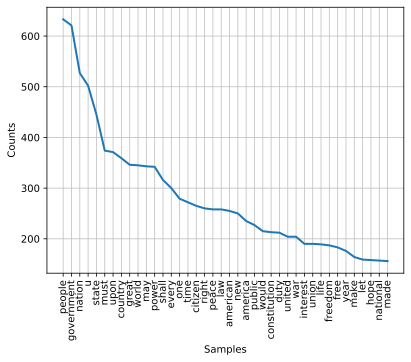

<Axes: xlabel='Samples', ylabel='Counts'>

In [43]:
counts.plot(40, cumulative=False)

Otra forma de analizar la frecuencia de aparición de las palabras en el corpus es dibujando una nube llena de muchas palabras de diferentes tamaños, que representan la frecuencia o la importancia de cada palabra. Esto es lo que se conoce como **word cloud** o **nube de palabras**.

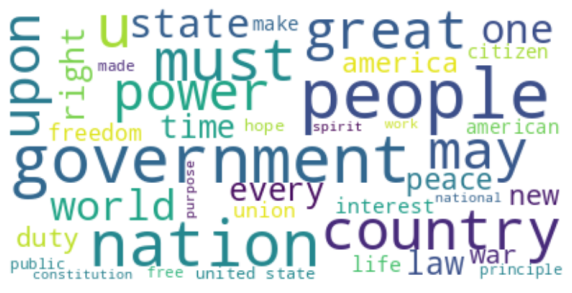

In [44]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(' '.join(tokens_corpus))

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3.2 Bag of Words (BOW)

Si este análisis de frecuencia lo hicieramos a nivel de documento, en vez de a nivel de corpus, nos estaría indicando la ocurrencia de cada palabra por documento. De hecho, este conteo de palabras por documento es lo que se conoce como **bag-of-words** (bolsa de palabras) o, de manera abreviada como, **BoW**. En concreto, **bag-of-words** es una representación de texto que describe la ocurrencia de palabras dentro de un documento.

Se llama "bolsa" de palabras, porque cualquier información sobre el orden o la estructura de las palabras en el documento es descartada. El modelo sólo se ocupa de si las palabras conocidas aparecen en el documento, no de dónde aparecen en el documento.

Para obtener la representación BoW podemos utilizar varias librerías. `Sklearn` incluye funcionalidades para el análisis de texto, y las propias funcionalidades de NLTK para el conteo de palabras o análisis frecuencial de palabras podrían valernos. Sin embargo, en esta sección vamos a ver cómo usar la librería de [`gensim`](https://pypi.org/project/gensim/) diseñada específicamente para el procesado de texto, permitiendo un procesado muy eficiente para grandes corpus e incluyendo funcionalides adicionales de gran utilidad.


El proceso de generación del BoW tiene dos pasos:
1. Generación del vocabulario del corpus. Este vocabulario se genera mediante un **diccionario** que almacena de manera ordenada un vocabulario de palabras conocidas (a nivel de corpus).
2. **Vectorización de documentos** o generación del BoW. Se calcula una medida de la presencia de palabras conocidas (las que están en el vocabulario); para ello, realiza  un conteo del número de veces que cada palabra del diccionario aparece dentro de cada documento.

Veamos a continuación, como implementar estos pasos:


### Generación del diccionario

In [45]:
import gensim

# Create dictionary of tokens: the input is the preprocessed corpus
D = gensim.corpora.Dictionary(corpus_prec)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 8009 terms
First terms in the dictionary:
0 : 14th
1 : accomplished
2 : accordingly
3 : acknowledge
4 : acquit
5 : act
6 : actual
7 : actuate
8 : add
9 : addition


Como vemos el diccionario no es más que una lista de palabras. Pero el orden de esta lista será muy importante para la vectorización de cada documento, ya que generaremos tuplas de (`id`, `conteo`) y los `id` serán las posiciones de estas palabras en el diccionario.

### Gestión del Vocabulario

A medida que el tamaño del vocabulario aumenta, también lo hace la representación vectorial de los documentos. En el ejemplo anterior, la longitud del vector de los documentos es igual al número de palabras conocidas.

Para un corpus muy grande, como miles de documentos, la longitud del vector que representará cada documento puede ser de miles o millones de posiciones.

Además, cada documento puede contener muy pocas de las palabras conocidas en el vocabulario, lo que dificulta el procesado.

Para evitar esto, es recomendable analizar el diccionario y eliminar tokens que no resulten relevantes: marcas de puntuación que todavía queden o términos que aparecen en muy pocos casos (por lo que no son términos poco informativos) o, incluso, tokens que figuran en todos los documentos del corpus (y no son discriminativos).




El diccionario de Gensim nos permite filtrar estos terminos fácilmente:

* `.filter_tokens()` nos permite indicar con el parámetro `bad_ids` la lista de ids de las palabras a eliminar o con `good_ids` la lista de los ids de las palabras a dejar en el diccionario (eliminando el resto).

* `.filter_extremes()` permite eliminar palabras/tokens poco o muy frecuentes indicando con los parámetros:
  * `no_below`: se queda con el número de tokens que están contenidas en al menos `no_below` documentos.
  * `no_above`:  se queda con el porcentaje  (fracción del tamaño total del corpus, no un número absoluto) de tokens que no están en más de `no_above` documentos.
  * `keep_n`: directamente se queda con los `keep_n` tokens más frecuentes.
  * `keep_tokens`: listado de tokens que deben permanecer en el diccionario después de ser filtradas.

Veamos como utilizar estas dos funcionalidades...

In [46]:
D.filter_tokens(bad_ids=[0])  # quitamos del diccionario el término "14th"
n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 8008 terms
First terms in the dictionary:
0 : accomplished
1 : accordingly
2 : acknowledge
3 : acquit
4 : act
5 : actual
6 : actuate
7 : add
8 : addition
9 : addressed


In [47]:
no_below = 5 #Minimum number of documents to keep a term in the dictionary
no_above = .75 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 1500 terms
First terms in the dictionary:
0 : accomplished
1 : acknowledge
2 : act
3 : actual
4 : add
5 : administration
6 : adopt
7 : advanced
8 : advancement
9 : advantage


Esto elimina todas los tokens en el diccionario que son:
1. Los `no_below=5` tokens menos frecuentes  
2. El `no_above=0.75` ($75\%$) de tokens más frecuentes.
3. Después de (1) y (2), guarda sólo los primeros `keep_n` tokens más frecuentes (o guarda todos si `keep_n=None`).



#### **Ejercicio 7**: Refinando el diccionario
A continuación, vamos a volver a generar el diccionario de nuestro corpus y analizar la aparición de palabras por documento. A partir de este análisis decida qué palabras eliminaría del diccionario y use las funciones anteriores para refinar el diccionario.

Para este análisis usamos algunos de los métodos de la clase diccionario de gensim como `dfs` (calcula en cuántos documentos del corpus aparece cada palabra del vocabulario). Puede ver la ayuda en este [link](https://radimrehurek.com/gensim/corpora/dictionary.html).

In [48]:
# Recompute the dictionary
D = gensim.corpora.Dictionary(corpus_prec)
n_tokens = len(D)
print(n_tokens)

8009


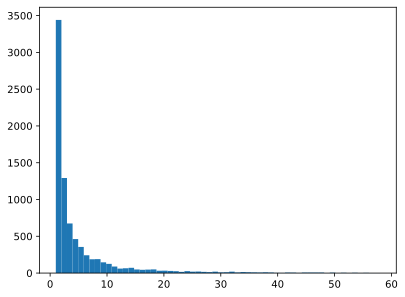

In [49]:
# Analize the word frequency per document
plt.hist(D.dfs.values(),58)
plt.show()
# we have 58 documents, some words are in all of them -> no_above= 0.8%
# There are many words in a single document -> no_below = 5

In [50]:
# Incluya aqui su código para limpiar el diccionario
#<SOL>
no_below = 6 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)
#</SOL>

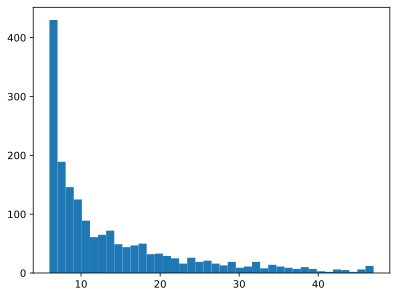

In [51]:
# Analize the word frequency per document again to check your solution
plt.hist(D.dfs.values(),40)
plt.show()

### Vectorización de los documentos

Una vez definido nuestro diccionario, el último paso es generar el BoW. Para ello, para cada documento, tenemos que generar un vector de longitud el vocabulario y en cada posición un valor con el conteo o número de veces que esa palabra aparece en el documento. De este modo, cada documento se transforma en una lista de tuplas `(id, n)`, donde `id` es el id de la palabra dentro del diccionario y `n` el conteo de esa palabra dentro del documento.

Para generar esta lista de tuplas vamos a usar el método `.doc2bow()`. En general, `D.doc2bow(token_list)` transforma cualquier lista de tokens en una lista de tuplas `(token_id, n)`, una por cada token en `token_list`, donde `token_id` es el identificador del token (según el diccionario `D`) y `n` es el número de ocurrencias de dicho token en `token_list`.

Veamos cómo calcular el BoW para el primer documento del corpus y analicemos la salida

In [52]:
corpus_bow = D.doc2bow(corpus_prec[0])

print('Original document (after cleaning):')
print(corpus_prec[0])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[:10]]
print(list_word_counts)

Original document (after cleaning):
['senate', 'house', 'representative', 'among', 'vicissitude', 'incident', 'life', 'event', 'could', 'filled', 'greater', 'anxiety', 'notification', 'transmitted', 'order', 'received', '14th', 'day', 'present', 'month', 'one', 'hand', 'summoned', 'country', 'whose', 'voice', 'never', 'hear', 'veneration', 'love', 'retreat', 'chosen', 'fondest', 'predilection', 'flattering', 'hope', 'immutable', 'decision', 'asylum', 'declining', 'year', 'retreat', 'rendered', 'every', 'day', 'necessary', 'well', 'dear', 'addition', 'habit', 'inclination', 'frequent', 'interruption', 'health', 'gradual', 'waste', 'committed', 'time', 'hand', 'magnitude', 'difficulty', 'trust', 'voice', 'country', 'called', 'sufficient', 'awaken', 'wisest', 'experienced', 'citizen', 'distrustful', 'scrutiny', 'qualification', 'could', 'overwhelm', 'despondence', 'one', 'inheriting', 'inferior', 'endowment', 'nature', 'unpracticed', 'duty', 'civil', 'administration', 'ought', 'peculiarly

#### **Ejercicio 8**: Obtenga el BoW de todos los documentos del corpus

Almacene la salida en una lista llamada `corpus_bow` donde cada elemento de la lista sea el BoW de un documento, para a continuación poder analizar la salida y representarla.

In [53]:
#<SOL>
corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]
#</SOL>

In [54]:
n_doc=50
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)


Original document (after cleaning):
['chief', 'justice', 'president', 'vice', 'president', 'quayle', 'senator', 'mitchell', 'speaker', 'wright', 'senator', 'dole', 'congressman', 'michael', 'fellow', 'citizen', 'neighbor', 'friend', 'man', 'earned', 'lasting', 'place', 'heart', 'history', 'president', 'reagan', 'behalf', 'nation', 'thank', 'wonderful', 'thing', 'done', 'america', 'repeated', 'word', 'word', 'oath', 'taken', 'george', 'washington', '200', 'year', 'ago', 'bible', 'placed', 'hand', 'bible', 'placed', 'right', 'memory', 'washington', 'u', 'today', 'bicentennial', 'inauguration', 'washington', 'remains', 'father', 'country', 'would', 'think', 'gladdened', 'day', 'today', 'concrete', 'expression', 'stunning', 'fact', 'continuity', '200', 'year', 'since', 'government', 'began', 'meet', 'democracy', 'front', 'porch', 'good', 'place', 'talk', 'neighbor', 'friend', 'day', 'nation', 'made', 'whole', 'difference', 'moment', 'suspended', 'first', 'act', 'president', 'prayer', 'ask'

<ipython-input-55-d7bdb8515caa>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


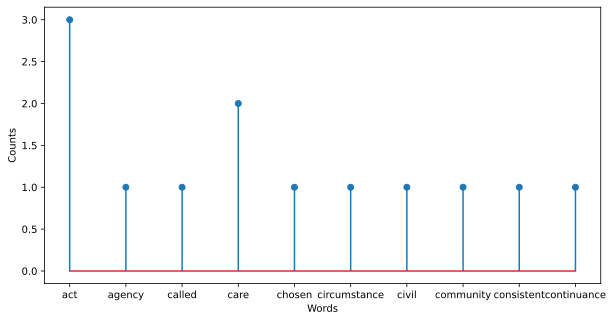

In [55]:
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## 3.3 Representación TF-IDF

Un problema del BoW es que la frecuencia de las palabras muy frecuentes empiezan a dominar en el documento respecto al resto; por ejemplo, verbos muy comunes o términos habituales en el contexto del corpus pero no tienen tanto "contenido informativo" para el modelo como pueden ser palabras más raras pero tal vez específicas del dominio. Al realizar la gestión del vocabulario hemos visto que podemos eliminar estas palabras tan frecuentes, pero este proceso es bastante manual y es preferible tener una vectorización robusta a esto.

Para ello, la representación TF-IDF (Term Frequency–Inverse Document Frequency) propone reajustar la frecuencia de las palabras en función de la frecuencia con que aparecen en todos los documentos, de modo que se penalicen las puntuaciones de palabras frecuentes si también son frecuentes en todos los documentos. Para ello, el TF-IDF implica el cálculo de dos valores:




**Frecuencia de término (TF)**

Por frecuencia de término $\text{TF}(w)$ nos referimos al número de veces que una palabra $w$ dada ocurre en un documento (directamente el valor que da el BoW).

En ocasiones, se redefine este factor diviendo por el número total de palabras en dicho documento o por la frecuencia máxima de algún término de ese documento (para penalizar a los documentos largos):
$$ \text{TF}(w,d) =\frac{\text{# veces que $w$ aparece en el documento $d$}}{\text{# total de palabras en el documento $d$}}$$

**Frecuencia de Documento Inversa (IDF)**

Es una medida de cuánta información proporciona la palabra $w$, es decir, si es común o rara en todos los documentos del corpus $D$. Se calcula de la siguiente manera:
$$ \text{IDF}(w,D) =\log \frac{\text{# documentos en el corpus}}{1+\text{# documentos donde la palabra $w$ aparece}}$$

A partir de estos valores el **TF-IDF** se calcula de la siguiente manera:

$$\text{TF-IDF}(w,d,D) = \text{TF}(w,d) * \text{IDF}(w,D)$$

Un peso alto en TF-IDF se consigue cuando la palabra tiene una frecuencia alta en el documento y, a la vez, una frecuencia baja en el corpus; por lo tanto, los pesos tienden a filtrar los términos que son comunes a muchos documentos.

Obsérvese que, a diferencia de la codificación BoW, para el TF-IDF tenemos que parender la codificación conjuntamente con todo el corpus. No obstante, una vez que hemos calculado el BoW para todos los documentos, aprender el modelo TF-IDF es sencillo usando la función [TfidfModel](https://radimrehurek.com/gensim/models/tfidfmodel.html) de Gensim.

In [56]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model = TfidfModel(corpus_bow)

# apply model to the first corpus document
vector = model[corpus_bow[0]]  # apply model to the first corpus document
print(vector)



[(0, 0.046440437941868105), (1, 0.0775126097301934), (2, 0.017707871128731872), (3, 0.06775707421652538), (4, 0.04025776410664402), (5, 0.039406401687323935), (6, 0.06019009299680879), (7, 0.06019009299680879), (8, 0.06019009299680879), (9, 0.03503038786211649), (10, 0.027787914591187745), (11, 0.05695804646721135), (12, 0.06019009299680879), (13, 0.026508109051703338), (14, 0.029117921208483485), (15, 0.04878004291705718), (16, 0.010727258787353923), (17, 0.0775126097301934), (18, 0.018690862328046783), (19, 0.04878004291705718), (20, 0.06376295467525273), (21, 0.06376295467525273), (22, 0.12038018599361758), (23, 0.06019009299680879), (24, 0.12038018599361758), (25, 0.07228523348566589), (26, 0.04025776410664402), (27, 0.06019009299680879), (28, 0.054007419161584705), (29, 0.031945460096323056), (30, 0.06775707421652538), (31, 0.04878004291705718), (32, 0.05557582918237549), (33, 0.04025776410664402), (34, 0.06775707421652538), (35, 0.0775126097301934), (36, 0.021823317532409882), (3

#### **Ejercicio 9**: Obtenga el TFIDF de todos los documentos del corpus

Almacene la salida en una lista llamada `corpus_tfifd` donde cada elemento de la lista sea el TFIDF de un documento, para a continuación poder analizar la salida y representarla.

In [57]:
#<SOL>
# apply model to all corpus document
corpus_tfidf = model[corpus_bow]  # apply model to corpus
#</SOL>

Analicemos esta transformación en comparación con el BoW

In [58]:
n_doc=50
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse TFIDF vector representation (first 10 components):')
print(corpus_tfidf[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)
print('TF-IDF for the document (first 10 components):')
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
print(list_tfidf)

Original document (after cleaning):
['chief', 'justice', 'president', 'vice', 'president', 'quayle', 'senator', 'mitchell', 'speaker', 'wright', 'senator', 'dole', 'congressman', 'michael', 'fellow', 'citizen', 'neighbor', 'friend', 'man', 'earned', 'lasting', 'place', 'heart', 'history', 'president', 'reagan', 'behalf', 'nation', 'thank', 'wonderful', 'thing', 'done', 'america', 'repeated', 'word', 'word', 'oath', 'taken', 'george', 'washington', '200', 'year', 'ago', 'bible', 'placed', 'hand', 'bible', 'placed', 'right', 'memory', 'washington', 'u', 'today', 'bicentennial', 'inauguration', 'washington', 'remains', 'father', 'country', 'would', 'think', 'gladdened', 'day', 'today', 'concrete', 'expression', 'stunning', 'fact', 'continuity', '200', 'year', 'since', 'government', 'began', 'meet', 'democracy', 'front', 'porch', 'good', 'place', 'talk', 'neighbor', 'friend', 'day', 'nation', 'made', 'whole', 'difference', 'moment', 'suspended', 'first', 'act', 'president', 'prayer', 'ask'

<ipython-input-59-7f1aab5f1db9>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


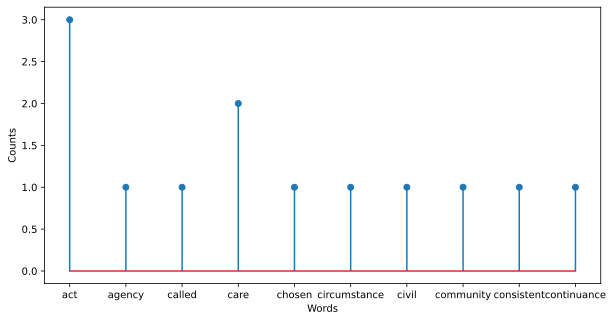

In [59]:
#Plot BoW
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

<ipython-input-60-710b21ecc997>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(words,counts, use_line_collection = True)


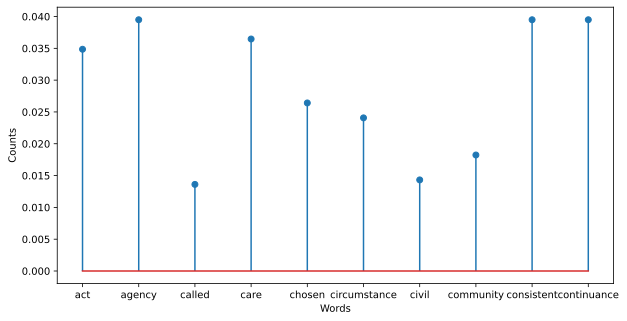

In [60]:
#Plot Tf-IDF
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

Compare ambas representaciones... ¿Qué palabras tenían más/menos peso en la representación BoW? ¿Y en la representación TF-IDF?

## 3.4 BOW y TF-IDF en sklearn

Sklearn también incuye funciones para hacer la tokenización y vectorización de documentos. En concreto, tiene las funciones:
*  [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) que implementa tanto la tokenización como el recuento de palabras (BoW) en una sola clase.
* [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) que se encarga de obtener la representación TF-IDF a partir de una representación BoW.

* [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) que equivale a usar `CountVectorizer()` seguido de `TfidfTransformer()`.

Veamos cómo funcionan estos métodos y qué nos permiten hacer.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
# We start from a raw corpus
corpus_example = [
     'This is the first document of my book.',
     'This document is a new document.',
     'And this is the document 3.',
     'Is this the best document??']

# Define the CountVectorizer method
vectorizer = CountVectorizer()
# and fit it!
vectorizer.fit(corpus_example)
# Now, we can obtain the bow of any text (or the corpus)
X = vectorizer.transform(corpus_example)
print(X.toarray()) # By default, it is a sparse matrix

[[0 0 1 1 1 1 1 0 1 1 1]
 [0 0 0 2 0 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 0 1 1]]


In [62]:
# We can access to the vocabulary
vectorizer.vocabulary_

{'this': 10,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 'of': 8,
 'my': 6,
 'book': 2,
 'new': 7,
 'and': 0,
 'best': 1}

La configuración por defecto tokeniza cada texto, convierte todo a minúsculas y  extrae palabras de al menos 2 letras (vemos que ha eliminado `'a'` y `'3'` por ser tokens con un único caracter); además, elimina la puntuación.

Si queremos, `CountVectorizer` nos deja incluir algunas funcionalidades adicionales como:
* Incluir una lista de *stop words* con el parametro `stop_words`
* Refinar el diccionario de manera similar a como nos deja Gensim con los siguientes parámetros:
  * `min_df`: umbral para ignorar los términos que aparecen en menos de  `min_df` documentos.
  * `max_df`: umbral para ignorar los términos que aparecen en más de  `max_df` documentos.  
  * `max_features`: número de términos a incluir en el diccionario (se queda con las `max_features` palabras más frecuentes).


En el siguiente ejemplo vemos como incluir un filtrado de *stop words*.


In [63]:
vectorizer2 = CountVectorizer(stop_words='english')
X2 = vectorizer2.fit_transform(corpus_example)
print(vectorizer2.vocabulary_)

{'document': 2, 'book': 1, 'new': 3, 'best': 0}


A pesar de todas estas facilidades, puede ocurrir que queramos incluir pasos adicionales en nuestro preprocesado como la lematización y para ello no sea suficiente con configurar estos parámetros. En este caso tenemos dos opciones:
* Utilizar NLTK + Gensim
* Incluir nuestro preprocesado con NLTK sobre la clase de sklearn.

Para llevar a cabo esta segunda opción, lo más sencillo es definir una clase u objeto encargada de aplicar el preprocesado deseado y pasárselo a `CountVectorizer` en el parámetro `analyzer`. Veamos cómo aplicarlo con nuestro ejemplo.

In [64]:
# create a custom analyzer class
class MyTextPreprocessing(object):

    def __init__(self):
        ## Load Modules
        self.lemmatizer  = WordNetLemmatizer()
        self.stopwords_en   = set(nltk.corpus.stopwords.words('english'))
        self.punctuation = string.punctuation

    # allow the class instance to be called just like
    # a function that applies the preprocessing
    def __call__(self, text):
        text2 = text.lower()
        text_tokens = nltk.word_tokenize(text2)
        text_clean = [token for token in  text_tokens if (token not in self.stopwords_en) and token.isalnum()]
        normalized_text = [self.lemmatizer.lemmatize(t) for t in text_clean]
        return normalized_text

analyzer = MyTextPreprocessing()
custom_vec = CountVectorizer(analyzer=analyzer)
X_example = custom_vec.fit_transform(corpus_example)
tokens = custom_vec.get_feature_names_out()
print(tokens)

['3' 'best' 'book' 'document' 'first' 'new']


Si lo aplicamos sobre nuestro corpus de documentos

In [65]:
# Leemos todo el corpus
corpus = []
for fileid in inaugural.fileids():
  text = inaugural.raw(fileid)
  corpus.append(text)

# Incluimos la limpieza del diccionario
no_below = 6 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

analyzer = MyTextPreprocessing()
custom_vec = CountVectorizer(analyzer=analyzer, min_df= no_below, max_df =no_above)
X_bow = custom_vec.fit_transform(corpus)
tokens = custom_vec.get_feature_names_out()
print(tokens)

['abandon' 'abiding' 'ability' ... 'young' 'zeal' 'zealously']


In [66]:
print('Original document')
print(corpus[0][:100])
print('Sparse vector representation (first 10 components):')
print(X_bow[0,:].data[:10])
print('Pair of words a count values (first 10 components):')
list_word_counts = [(tokens[index], X_bow[0,index]) for index in X_bow[0,:].indices[:10]]
print(list_word_counts)



Original document
Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident 
Sparse vector representation (first 10 components):
[1 2 2 1 1 1 2 3 1 1]
Pair of words a count values (first 10 components):
[('senate', 1), ('house', 2), ('representative', 2), ('among', 1), ('vicissitude', 1), ('incident', 1), ('event', 2), ('could', 3), ('greater', 1), ('anxiety', 1)]


Si a partir del BoW queremos obtener el TF-IDF, podemos usar la función `TfidfTransformer`

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizerTFIDF = TfidfTransformer()
vectorizerTFIDF.fit(X_example)
X_tfidf_example =  vectorizerTFIDF.transform(X_example)
print(X_tfidf_example.toarray())

[[0.         0.         0.66338461 0.34618161 0.66338461 0.        ]
 [0.         0.         0.         0.722056   0.         0.69183461]
 [0.88654763 0.         0.         0.46263733 0.         0.        ]
 [0.         0.88654763 0.         0.46263733 0.         0.        ]]


Podemos incluirlo todo en un pipeline

*Nota*: Un **pipeline** es un método de sklearn que nos permite definir una secuencia de funciones y trabajar con ellas como un única, facilitando el entrenamiento, validación y testeo de modelos compuestos por secuencias de métodos.

In [68]:
from sklearn.pipeline import Pipeline
# Define the steps of the pipeline
pipe = Pipeline([('count', CountVectorizer()),
                  ('tfid', TfidfTransformer())])
# Train all the steps of the pipeline
pipe.fit(corpus_example)
# Get new outputs of the overall pipeline
pipe.transform(corpus_example).toarray()


array([[0.        , 0.        , 0.43750519, 0.22830836, 0.43750519,
        0.22830836, 0.43750519, 0.        , 0.43750519, 0.27925389,
        0.22830836],
       [0.        , 0.        , 0.        , 0.64308448, 0.        ,
        0.32154224, 0.        , 0.61616842, 0.        , 0.        ,
        0.32154224],
       [0.67049706, 0.        , 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318]])

O directamente utilizar la clase `TfidfVectorizer`

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus_example).toarray()


array([[0.        , 0.        , 0.43750519, 0.22830836, 0.43750519,
        0.22830836, 0.43750519, 0.        , 0.43750519, 0.27925389,
        0.22830836],
       [0.        , 0.        , 0.        , 0.64308448, 0.        ,
        0.32154224, 0.        , 0.61616842, 0.        , 0.        ,
        0.32154224],
       [0.67049706, 0.        , 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318]])

## Limitaciones de BoW y TF-IDF

Las representaciones vectoriales que acabamos de ver son sencillas de comprender y aplicar y ofrecen mucha flexibilidad para manejo de información textual. De hecho, se han utilizado con gran éxito en problemas de predicción y clasificación de documentos.

Sin embargo, sufre de algunas deficiencias que tenemos que tener en cuenta:
* El vocabulario: El vocabulario requiere un diseño cuidadoso, más específicamente para gestionar su tamaño, lo que afecta a la dispersión de las representaciones de los documentos.
* La dispersión: Las representaciones dispersas son más difíciles de modelar tanto por razones computacionales como por razones de información, en las que el reto es que los modelos aprovechen la poca información común en un espacio de representación tan grande.
* Significado: Al descartar el orden de las palabras se ignora el contexto y, a su vez, el significado de las palabras del documento (semántica). El contexto y el significado pueden ofrecer mucho al modelo, que si se modela podría diferenciar entre las mismas palabras dispuestas de manera diferente ("esto es interesante" vs "es esto interesante?"), sinónimos ("bicicleta vieja" vs "bicicleta usada"), y mucho más.


# 4. Utilizando la representación vectorial en modelos de aprendizaje

Una vez tenemos una representación vetorial para cada documento del corpus podemos usar los modelos de aprendizaje que conocemos para resolver diferentes tareas. Por ejemplo, si este corpus estuviese distribuido por categorías, podríamos aprender un modelo para clasificar automáticamente los textos en las diferentes categorías. Como el corpus con el que estamos trabajando no está etiquetado, vamos a usar la representación vectorial que hemos obtenido para hacer un agrupamiento de los documentos usando un K-means y luego analizar qué información nos da este agrupamiento.

## 4.1 Codificación de los datos

Primero de todo, para poder usar las librerías de sklearn, tenemos que convertir nuestra representación vectorial en numpy arrays. Para ello, gensim nos incluye dos funciones: [corpus2dense](https://tedboy.github.io/nlps/generated/generated/gensim.matutils.corpus2dense.html), [corpus2csc](https://tedboy.github.io/nlps/generated/generated/gensim.matutils.corpus2csc.html)

In [70]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_bow_sparse = corpus2csc(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

Veamos qué han hecho estas transformaciones, por ejemplo, para la representación BoW:

In [71]:
print(corpus_bow[50])

[(2, 3), (12, 1), (37, 1), (38, 2), (42, 1), (43, 1), (44, 1), (47, 1), (57, 1), (60, 1), (61, 2), (63, 1), (66, 9), (69, 1), (86, 1), (105, 2), (106, 1), (111, 1), (113, 1), (116, 1), (119, 2), (123, 4), (125, 1), (130, 1), (131, 1), (134, 2), (137, 8), (139, 1), (141, 1), (143, 1), (146, 2), (149, 1), (163, 1), (165, 1), (166, 1), (167, 1), (168, 1), (169, 2), (173, 5), (174, 5), (176, 1), (177, 6), (178, 1), (179, 1), (180, 4), (181, 2), (184, 1), (185, 3), (189, 1), (201, 1), (203, 1), (204, 1), (205, 1), (207, 2), (210, 4), (211, 2), (219, 6), (220, 1), (228, 1), (230, 1), (231, 2), (252, 1), (255, 2), (256, 1), (258, 3), (260, 1), (266, 2), (268, 1), (269, 1), (274, 1), (279, 1), (280, 2), (281, 1), (284, 2), (286, 2), (291, 1), (296, 1), (299, 3), (300, 1), (306, 7), (308, 1), (312, 1), (313, 2), (316, 1), (322, 1), (329, 2), (335, 2), (337, 1), (346, 2), (347, 1), (348, 5), (349, 1), (353, 1), (355, 1), (358, 1), (369, 3), (374, 1), (385, 1), (394, 3), (400, 1), (401, 1), (404,

In [72]:
print(corpus_bow_dense[50,:20])

[0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [73]:
print(corpus_bow_sparse[50,:])

  (0, 2)	3.0
  (0, 12)	1.0
  (0, 37)	1.0
  (0, 38)	2.0
  (0, 42)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 47)	1.0
  (0, 57)	1.0
  (0, 60)	1.0
  (0, 61)	2.0
  (0, 63)	1.0
  (0, 66)	9.0
  (0, 69)	1.0
  (0, 86)	1.0
  (0, 105)	2.0
  (0, 106)	1.0
  (0, 111)	1.0
  (0, 113)	1.0
  (0, 116)	1.0
  (0, 119)	2.0
  (0, 123)	4.0
  (0, 125)	1.0
  (0, 130)	1.0
  (0, 131)	1.0
  :	:
  (0, 1685)	3.0
  (0, 1691)	2.0
  (0, 1692)	1.0
  (0, 1696)	2.0
  (0, 1699)	1.0
  (0, 1706)	2.0
  (0, 1707)	1.0
  (0, 1710)	1.0
  (0, 1715)	4.0
  (0, 1717)	1.0
  (0, 1718)	1.0
  (0, 1719)	1.0
  (0, 1726)	1.0
  (0, 1728)	2.0
  (0, 1732)	1.0
  (0, 1733)	4.0
  (0, 1734)	1.0
  (0, 1737)	1.0
  (0, 1739)	2.0
  (0, 1745)	1.0
  (0, 1748)	1.0
  (0, 1749)	3.0
  (0, 1752)	1.0
  (0, 1754)	1.0
  (0, 1756)	2.0


En general, cuando tengamos grandes corpus de datos, nos interesará manejar la representación dispersa o sparse de los datos para ahorrar en coste computacional. Si en nuestro procesado de ML usamos sklearn podremos trabajar con este formato sparse ya que la mayoría de clasificadores/regresores puede trabajar con ambos datos densos y dispersos.

Pasemos ahora a aplicar un agrupamiento o clustering de nuestros documentos usando ambas representaciones vectoriales (BoW y TFIDF). En ambos casos usaremos la representación sparse de los datos.

## 4.2 Cálculo de distancias entre representaciones BoW y TF-IDF

Una vez que tenemos la representación vectorial de nuestros documentos (cada una de las filas de la matriz BoW o TFIDF), muchos de nuestros modelos de ML necesitarán calcular similitudes entre ellos, como puede ser un algoritmo K-NN para regresión o un K-means para agrupamiento. Para ello, cuando trabajamos  con características BoW o TFIDF, donde la magnitud de los vectores no importa, suele utilizarse como métrica la **similitud del coseno**.

Podríamos suponer que cuando una palabra (por ejemplo, ciencia) aparece con más frecuencia en el documento 1 que en el 2, ese documento 1 está más relacionado con el tema de la ciencia. Sin embargo, también podría darse el caso de que estemos trabajando con documentos de longitudes desiguales (artículos de Wikipedia, por ejemplo). En ese caso, es probable que la ciencia aparezca más en el documento 1 sólo porque es mucho más largo que el documento 2. La similitud del coseno corrige esto.

Por esta razón, cuando se trabaja con documentos codificados con BoW o TF-IDF, se tiende a utilizar la similitud del coseno. Si $\mathbf{v}_1$ y $\mathbf{v}_2$ son dos vectores TF-IDF, la similitud del coseno se calcula como sigue:


$$\text{cos}(\mathbf{v}_1,\mathbf{v}_2) = \frac{\mathbf{v}_1^T~\mathbf{v}_2}{||\mathbf{v}_1||_2 ||\mathbf{v}_2||}$$

O, más bien se usa la distancia coseno definda como $1-\text{cos}(\mathbf{v}_1,\mathbf{v}_2) $, es decir,
$$d_\text{cos}(\mathbf{v}_1,\mathbf{v}_2) = 1- \frac{\mathbf{v}_1^T~\mathbf{v}_2}{||\mathbf{v}_1||_2 ||\mathbf{v}_2||}$$



<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/NLP/NLP1.png" width="100%">

Y como podemos ver en la siguiente figura, sus resultados no tienen nada que ver con la distancia euclídea (no dependen de la longitud de los vectores)

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/NLP/NLP2.png" width="60%">


Otro aspecto que tenemos que tener en cuenta es que la distancia coseno no es una distancia como tal (no cumple la desigualdad triangular) e implementaciones por defecto de nuestros modelos de aprendizaje como el K-NN o K-means de sklearn usan la distancia euclídea por defecto y no permiten incluir la distancia coseno.

Para solventar este problema tenemos dos opciones:
* Usar otras implementaciones como K-means de NLTK que nos permite usar la distancia coseno. Aunque el problema de esta implementación es que no nos deja trabajar con matrices sparse.
* Reescalar nuestros datos para poder utilizar implementaciones basadas en la distancia euclídea... (luego explicaremos en qué consiste esta aproximación).



## 4.3 ¿Normalización de los datos?

Hasta ahora siempre hemos visto en nuestro pipeline de ML que debemos normalizar los datos por columnas (por características) antes de pasarlos al modelo de aprendizaje.

Pero trabajando con representaciones vectoriales de texto como BoW o TF-IDF, ¿necesitamos normalizar? Aunque no hay una respuesta cerrada, la idea más aceptada es que las representaciones BoW o TF-IDF u otras transformaciones NLP que veremos más adelante deberían dejarse tal y como están para obtener mejores resultados.

Esto se debe a que la normalización de las variables BoW no se considera algo natural, perdemos la importancia de cada palabra dentro del documento. Mientras que la codificación TF-IDF ya se considera que está normalizada; nótese que:
* El cálculo del TF normaliza cada documento a longitud 1 (normalización por filas), eliminado la dependencia con documentos más largos o más cortos.
*  En segundo lugar, el IDF es una normalización entre documentos que da menos peso a los términos comunes y más a los raros (normalización por columnas), normalizando (ponderando) cada palabra con la frecuencia inversa del corpus.

Por lo que el TF-IDF está pensado para ser utilizado en su forma directa en un algoritmo.

No obstante, tal y como veremos, algoritmos como el K-means que suelen ser muy sensibles al escalado de características la ponderación IDF ayuda a mejorar el resultado del agrupamiento y, por tanto, suelen obtenerse resultados mejores con representaciones TF-IDF que con BOW.

## 4.4 K-means con NLTK

Empecemos haciendo agrupamiento de datos usando la librería de NLTK que nos permite usar la distancia coseno.

Aunque, tal y como hemos comentado, el problema de esta implementación es que no nos deja trabajar con matrices sparse; así que tenemos que usar el método `.toarray()` para convertir nuestros vectores sparse en numpy arrays (o usar la conversión a matrices densas de gensim).

In [74]:
# Transform data to dense
corpus_bow_array = corpus_bow_sparse.toarray()
corpus_tfidf_array = corpus_tfidf_sparse.toarray()

Ahora entrenaremos el K-means con 4 centroides, tanto para la representación BoW como TF-IDF y analizaremos los resultados.

**Clustering de documentos con BoW**

In [75]:
import nltk
from nltk.cluster.kmeans import KMeansClusterer

K=4
kclusterer = KMeansClusterer(4, distance=nltk.cluster.util.cosine_distance, repeats=10)

y_kmeans = kclusterer.cluster(corpus_bow_array, assign_clusters=True)
centers = kclusterer.means()

¿Qué documentos están en cada grupo? ¿Qué información (textual) hay en cada grupo?

In [76]:
# Palabras más relevantes por centroide
n_center = 0
fileids = inaugural.fileids()
y_kmeans = np.array(y_kmeans)
for i, center_i in enumerate(centers):
  print('Centroide %d' %(i))
  # Find documents in this centroid
  pos_y = np.where(y_kmeans==i)[0]
  print('Elementos grupo %d' %(i))
  id_grupo = [fileids[pos] for pos in pos_y]
  print(id_grupo)

  # Find the ten most relevant words for this centroid
  pos_sort = np.argsort(centers[i])[::-1][:10]
  words_center = [D[p] for p in pos_sort]
  print(words_center)
  print('********')


Centroide 0
Elementos grupo 0
['1905-Roosevelt.txt', '1921-Harding.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reagan.txt', '1989-Bush.txt', '1993-Clinton.txt', '1997-Clinton.txt', '2001-Bush.txt', '2005-Bush.txt', '2009-Obama.txt', '2013-Obama.txt', '2017-Trump.txt', '2021-Biden.txt']
['america', 'freedom', 'peace', 'let', 'today', 'know', 'work', 'day', 'god', 'together']
********
Centroide 1
Elementos grupo 1
['1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1809-Madison.txt', '1825-Adams.txt', '1829-Jackson.txt', '1841-Harrison.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1913-Wilson.txt', '1929-Hoover.txt']
['upon', 'constitution', 'law', 'public', 'uni

**Clustering de documentos con TF-IDF**

In [77]:
K=4
kclusterer = KMeansClusterer(4, distance=nltk.cluster.util.cosine_distance, repeats=10)

y_kmeans = kclusterer.cluster(corpus_tfidf_array, assign_clusters=True)
centers = kclusterer.means()

In [78]:
# Palabras más relevantes por centroide
n_center = 0
fileids = inaugural.fileids()
y_kmeans = np.array(y_kmeans)
for i, center_i in enumerate(centers):
  print('Centroide %d' %(i))
  # Find documents in this centroid
  pos_y = np.where(y_kmeans==i)[0]
  print('Elementos grupo %d' %(i))
  id_grupo = [fileids[pos] for pos in pos_y]
  print(id_grupo)

  # Find the ten most relevant words for this centroid
  pos_sort = np.argsort(centers[i])[::-1][:10]
  words_center = [D[p] for p in pos_sort]
  print(words_center)
  print('********')


Centroide 0
Elementos grupo 0
['1937-Roosevelt.txt', '1941-Roosevelt.txt', '1965-Johnson.txt', '1985-Reagan.txt', '1993-Clinton.txt', '1997-Clinton.txt', '2001-Bush.txt', '2005-Bush.txt', '2009-Obama.txt', '2013-Obama.txt', '2017-Trump.txt', '2021-Biden.txt']
['america', 'democracy', 'story', 'today', 'journey', 'child', 'job', 'freedom', 'dream', 'ideal']
********
Centroide 1
Elementos grupo 1
['1865-Lincoln.txt', '1905-Roosevelt.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1989-Bush.txt']
['america', 'help', 'today', 'freedom', 'let', 'economic', 'thing', 'industrial', 'problem', 'leadership']
********
Centroide 2
Elementos grupo 2
['1793-Washington.txt', '1797-Adams.txt', '1809-Madison.txt', '1817-Monroe.txt', '1821-Monroe.t

Analice y discuta los resultados de ambos clusters para cada tipo de vectorización.

## 4.5 K-means con sklearn

Como hemos dicho anteriormente, no podemos usar las librerías de K-means o K-NN de sklearn con represntaciones BOW o TF-IDF porque solo permiten usar la distancia euclídea.

Sin embargo, cuando nuestros vectores $x$ e $y$ están normalizados ($||x||^2 = x^Tx = 1$), sus distancias euclídeas $||x-y||^2$  y coseno $d(x,y)$ están relacionas por la siguiente igualdad:

$$||x-y||^2 = x^Tx + y^Ty - 2 x^Ty = 2  (1 - x^Ty) = 2  d(x,y)$$

 En este caso, usar la distancia euclídea nos va a dar los mismos resultados que la distancia coseno.

Nótese que esta normalización es parecida al cálculo TF que compensa en la representación BoW la longitud de los documentos.

Así que comencemos normalizando nuestros datos para que cada vector tenga norma unidad (vamos a hacerlo sobre las reprentaciones sparse).


In [79]:
from scipy import sparse

def normalize_sparse_vector(s):
  norm_s = np.array(np.sqrt(s.multiply(s).sum(1)))
  pos_zero = np.where(np.sqrt(s.multiply(s).sum(1))==0)[0]
  norm_s[pos_zero] = 1
  return s.multiply(sparse.csr_matrix(1/norm_s))

corpus_bow_sparse_norm = normalize_sparse_vector(corpus_bow_sparse)
corpus_tfidf_sparse_norm = normalize_sparse_vector(corpus_tfidf_sparse)

Ahora calculemos el clustering con el K-means de sklearn

**Clustering de documentos con BoW**

In [80]:
import numpy as np
from sklearn.cluster import KMeans

# K-means with K=4 (we could use the silhouette score to adjust this parameter) and 10 initializations
K=4
kmeans = KMeans(n_clusters=K, n_init=10) # Definimos objeto con parámetros por defecto

kmeans.fit(corpus_bow_sparse_norm) # Entrenamos k-means usando el BoW
y_kmeans = kmeans.predict(corpus_bow_sparse_norm) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_ # Obtenemos los centroides

In [81]:
# Palabras más relevantes por centroide
n_center = 0
fileids = inaugural.fileids()
y_kmeans = np.array(y_kmeans)
for i, center_i in enumerate(centers):
  print('Centroide %d' %(i))
  # Find documents in this centroid
  pos_y = np.where(y_kmeans==i)[0]
  print('Elementos grupo %d' %(i))
  id_grupo = [fileids[pos] for pos in pos_y]
  print(id_grupo)

  # Find the ten most relevant words for this centroid
  pos_sort = np.argsort(centers[i])[::-1][:10]
  words_center = [D[p] for p in pos_sort]
  print(words_center)
  print('********')

Centroide 0
Elementos grupo 0
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1909-Taft.txt', '1925-Coolidge.txt']
['upon', 'public', 'constitution', 'law', 'duty', 'interest', 'union', 'peace', 'principle', 'national']
********
Centroide 1
Elementos grupo 1
['1905-Roosevelt.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt']
['peace', 'upon', 'men', 'justice', 'purpose', 'thing', 'n

**Clustering de documentos con TF-IDF**

In [82]:
# K-means with K=4 (we could use the silhouette score to adjust this parameter) and 10 initializations
K=4
kmeans = KMeans(n_clusters=K, n_init=10) # Definimos objeto con parámetros por defecto

kmeans.fit(corpus_tfidf_sparse_norm) # Entrenamos k-means usando el BoW
y_kmeans = kmeans.predict(corpus_tfidf_sparse_norm) # Obtenemos el identificador del grupo para cada dato
centers = kmeans.cluster_centers_ # Obtenemos los centroides

In [83]:
# Palabras más relevantes por centroide
n_center = 0
fileids = inaugural.fileids()
y_kmeans = np.array(y_kmeans)
for i, center_i in enumerate(centers):
  print('Centroide %d' %(i))
  # Find documents in this centroid
  pos_y = np.where(y_kmeans==i)[0]
  print('Elementos grupo %d' %(i))
  id_grupo = [fileids[pos] for pos in pos_y]
  print(id_grupo)

  # Find the ten most relevant words for this centroid
  pos_sort = np.argsort(centers[i])[::-1][:10]
  words_center = [D[p] for p in pos_sort]
  print(words_center)
  print('********')

Centroide 0
Elementos grupo 0
['1869-Grant.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1909-Taft.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt']
['business', 'method', 'tariff', 'revenue', 'enforcement', 'law', 'citizenship', 'congress', 'legislation', 'ought']
********
Centroide 1
Elementos grupo 1
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1917-Wilson.txt']
['union', 'constitution', 'opinion', 'public', 'territory', 'executive', 'object', 'foreign', 'congress', 'revenue']
********
Cent